In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from analyse_pressure import process_pressure_branch_and_paths, process_pressure_changes, sum_pressure_loss_branch_distribution


In [2]:
os.chdir("../../../")

In [3]:
plt.style.use("FST_bw.mplstyle")

In [4]:
folder_path = "new_solutions/real_GPZ/preplanning/"

files = [
    "cav/d94c77c7-b135-494a-ae1a-448225f2acd8.h5",
    "central CPC/67a3213e-c0cb-4f85-922c-3cc81f792324.h5",
    "central/d65d94b0-2b04-4a0d-937c-0e3c41602f66.h5",
    "distributed CPC/c5e8dad1-02ee-4c71-9d5f-55868feeb00e.h5",
    "fully distributed/335c31e3-4894-44be-b9ac-a33f7936c9b3.h5",
    "distributed/2a83e75a-7995-44a9-97c8-0f0919636428.h5",
          ]
cs_names = ["CAV", "VAV-CPC", "VAV-VPC", "DF-CPC", "ONLY-DF", "ODS-CC"]

files = [folder_path + x for x in files]

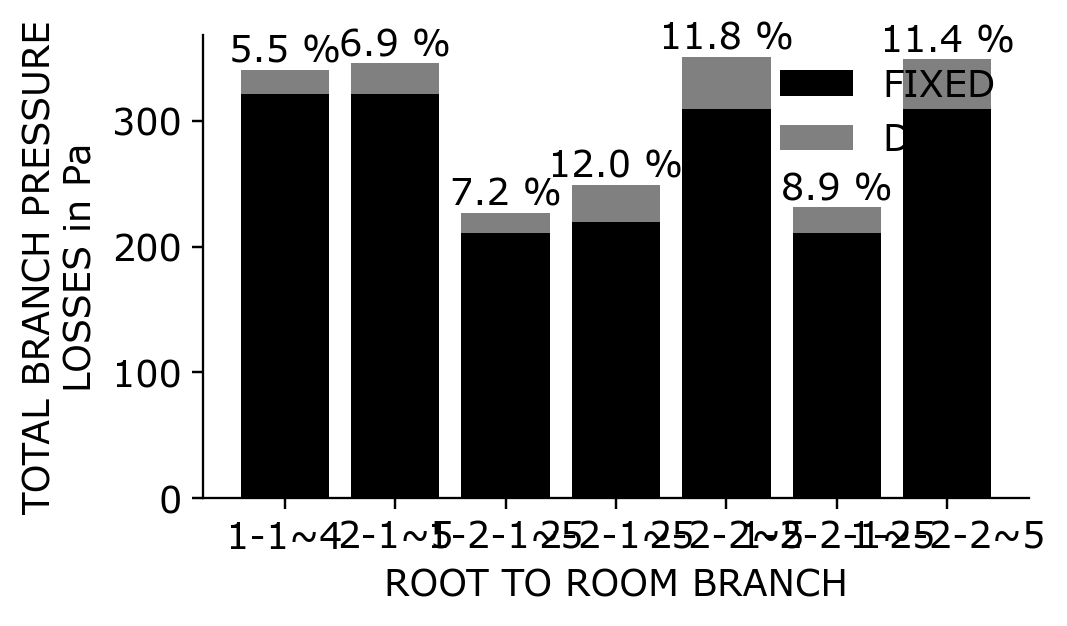

In [6]:
file = files[4]

pressure_branch, root_room_paths = process_pressure_branch_and_paths(file)

(pressure_changes_duct, pressure_changes_fixed) = process_pressure_changes(file)

fig, ax = plt.subplots(figsize=(5,3))

dp_dict = sum_pressure_loss_branch_distribution(root_room_paths, pressure_changes_duct, pressure_changes_fixed, 1)

dp_ratios_val = np.array(list(dp_dict["duct"].values()))/(np.array(list(dp_dict["duct"].values()) + np.array(list(dp_dict["fixed"].values()))))*100
dp_ratios = [str(x) + " %" for x in np.round(dp_ratios_val, 1)]

ax.bar(dp_dict["fixed"].keys(), dp_dict["fixed"].values(),color="k", label="FIXED")
p = ax.bar(dp_dict["duct"].keys(), dp_dict["duct"].values(),color="grey", bottom=dp_dict["fixed"].values(), label="DUCT")
# p =plt.bar(key, dp_dict["duct"],color="r", bottom = dp_dict["fixed"])
ax.bar_label(p, labels = dp_ratios)

# _ = ax.set_xticks(rotation=90)
ax.set_xlabel("ROOT TO ROOM BRANCH")
ax.set_ylabel("TOTAL BRANCH PRESSURE\nLOSSES in Pa")
ax.legend(loc="upper right")
fig.tight_layout()

In [7]:
scenario_dp_ratio = {}

for s in range(1,7):
    dp_dict = sum_pressure_loss_branch_distribution(root_room_paths, pressure_changes_duct, pressure_changes_fixed, s)

    scenario_dp_ratio[s] = np.mean(np.array(list(dp_dict["duct"].values()))/(np.array(list(dp_dict["duct"].values()) + np.array(list(dp_dict["fixed"].values()))))*100)

np.mean(list(scenario_dp_ratio.values()))

np.float64(9.444152122453529)

## Compare all control strategies 

In [8]:
s = 1

pressure_branch = {}
for idx, file in enumerate(files):
    dp_branch, path = process_pressure_branch_and_paths(file)
    pressure_branch[cs_names[idx]] = dp_branch[s]
    root_room_paths[cs_names[idx]] = path

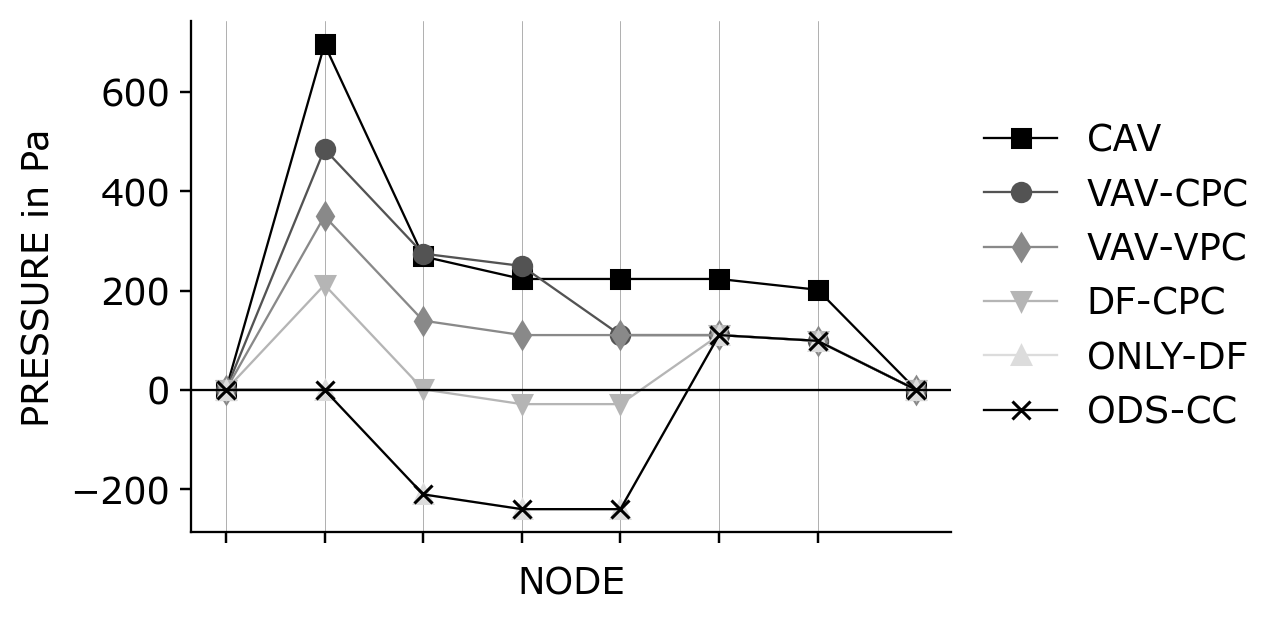

In [37]:
markerstyle = ["s","o","d","v","^","x","*", "p", "h", "H"]

fig, ax = plt.subplots(1,1,figsize=(6,3))

node = "2-2-2~5"



for idx, csi in enumerate(cs_names):
    dp_ = {key:value for key,value in pressure_branch[csi][node].items() if key not in ["0~01", "0~02","0~4","2~1","2~2","2~3","2-2~1","2-2~2","2-2~3"]}
    ax.plot(dp_.keys(), dp_.values(), label=csi, marker=markerstyle[idx])

ax.set_xlabel("NODE")
# ax[jdx].set_xticks(list(pressure_branch[csi][v].keys()))  # ensure ticks are set
# ax[jdx].set_xticklabels(ax[jdx].get_xticklabels(), rotation=90)
ax.axhline(0)

ax.set_ylabel("PRESSURE in Pa")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xticks(np.linspace(0,6,7),[""]*7)

fig.tight_layout()

for i in np.linspace(0,6,7):
    ax.axvline(i, color="grey", linewidth=0.2, zorder=-1)

fig.savefig("plots/full_paper/pressure_distribution.svg")
fig.savefig("plots/full_paper/pressure_distribution.png")